# microRNA scoring

This is the way that I evaluate my microRNAs
For this I am using the DE results with the log fold change
The impact of the microRNAs on the genes
The prescence of the genes in the muscle, and
The pathwyas of the genes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cityblock
from sklearn.cluster import SpectralClustering


In [2]:
from jupyter_functions import *

In [3]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

First we get the influence.
It is define as lists with +1 if it promotes the gene and -1 if it inhibits.
This already includes the pre selection of mirnas by pagerank and influence in general.
It has the genes on the columns and the rows are the microRNAs. The column final has the total of times the microRNA gets to a gene. 

In [4]:
influence_df = pd.read_csv(f"../data/mirna_influence_13_mirnas_39_genes_impact.csv", index_col=0)

In [5]:
influence_df

,E2F3,EGLN1,ROCK1,DNMT3A,PIK3CA,PKM,RAC1,MYC,RHOA,MUC1,...,UCP3,PPARA,MST1R,CTNNB1,ABCA4,MAP3K5,NR4A2,LRRFIP1,PDLIM7,IL6ST
hsa-miR-21-5p,"[1, 1, 1]","[1, 1]",[1],"[-1, -1]",[1],[-1],NaN,"[1, 1, 1, 1]","[-1, 1, 1]","[1, -1, -1, 1]",...,"[1, -1]","[-1, -1, 1]",[1],"[-1, 1]",[1],"[1, 1]",[-1],[-1],"[1, -1]",[1]
hsa-miR-210-3p,"[-1, -1, -1]",NaN,NaN,"[1, 1]",[-1],[1],NaN,"[-1, -1]",[-1],[-1],...,[-1],NaN,[-1],"[1, -1]",[-1],"[-1, -1]",NaN,NaN,"[-1, 1]",NaN
hsa-miR-145-5p,"[-1, -1, -1]","[1, -1]",[-1],"[1, 1]",[-1],[1],NaN,"[-1, -1, -1, -1]","[-1, 1, 1]","[-1, -1, -1, -1]",...,"[-1, -1]","[-1, -1, 1]",[-1],"[1, -1]",[-1],"[-1, -1]",[1],[1],"[-1, 1]",[1]
hsa-miR-143-3p,NaN,NaN,NaN,"[-1, -1]",[1],[-1],NaN,NaN,NaN,NaN,...,NaN,NaN,[1],[1],NaN,NaN,NaN,NaN,[-1],NaN
hsa-miR-375,NaN,NaN,NaN,NaN,[-1],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[-1],[-1],NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-224-5p,NaN,NaN,NaN,NaN,NaN,NaN,[-1],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-93-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
influence_df = influence_df.T

Now we get the log fold change of the genes

In [7]:
redulation_df = pd.read_csv('../data/RNAseq_abundance_adjusted_combat_inmose_all_lfc.csv', index_col=0)


In [8]:
redulation_df

,yo,ym,mo,ml_c,ml_s
gene,,,,,
CFH,-0.266518,NaN,NaN,NaN,NaN
SEMA3F,-4.102241,NaN,-3.743393,NaN,NaN
CFTR,-3.346279,NaN,-4.146497,NaN,NaN
RAD52,-0.556749,NaN,NaN,NaN,NaN
MYH16,7.573264,NaN,5.626051,NaN,NaN
...,...,...,...,...,...
Unnamed: 34254,-2.382550,NaN,NaN,NaN,NaN
Unnamed: 34260,-3.038266,NaN,NaN,NaN,NaN
Unnamed: 34273,-2.750935,NaN,-4.449913,NaN,NaN


In [9]:
int_influence_df = get_impact_data(influence_df)

int_influence_df

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
E2F3,3,-3,-3,NaN,NaN,NaN,NaN
EGLN1,2,NaN,0,NaN,NaN,NaN,NaN
ROCK1,1,NaN,-1,NaN,NaN,NaN,NaN
DNMT3A,-2,2,2,-2,NaN,NaN,NaN
PIK3CA,1,-1,-1,1,-1,NaN,NaN
PKM,-1,1,1,-1,NaN,NaN,NaN
RAC1,NaN,NaN,NaN,NaN,NaN,-1,NaN
MYC,4,-2,-4,NaN,NaN,NaN,NaN
RHOA,1,-1,1,NaN,NaN,NaN,NaN
MUC1,0,-1,-4,NaN,NaN,NaN,NaN


There are 3456 genes on the influence_df, and in the de  there are 3555.

We can meassure the desired effect by multiplying the impact (integer) of the microRNA of the gene by the lfc of the gene in the younger state vs the older state.

If the gene is downregulated (negative lfc) in young, that means that the desired impact (in theory) will be to reduce it, therefore we look for a negative impact (inhibition) 
-1 * -1 = 1 

Siminarly, if it is updegulated (positive lfc) we want it to increase (positive impact)
1 * 1 = 1 

Any other combination is undesirable. 


For this, we multiply the lfc for the impact. 

In [10]:
#int_influence_df = int_influence_df.T

In [11]:
int_influence_df = int_influence_df.merge(redulation_df, how='inner', left_index=True, right_index=True)


In [12]:
int_influence_df.drop(columns=['ml_c', 'ml_s'], inplace=True)
int_influence_df = int_influence_df.fillna(0)

We have 4 messurments from this
- Overall (sum)
- yo
- ym
- mo

And we addeded a 5th measuemrnet, how many desiable impact we have. For each cell, we would have a value between 0 and 3, 0 meanning no desiable impacts, and 3 impacting yo, ym and mo as expected.



In [13]:
int_influence_df


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p,yo,ym,mo
EGLN1,2,0,0,0,0,0,0,-0.210341,0.000000,0.000000
ROCK1,1,0,-1,0,0,0,0,-0.334888,0.000000,0.000000
PKM,-1,1,1,-1,0,0,0,0.408310,0.000000,0.000000
RAC1,0,0,0,0,0,-1,0,-2.438419,0.000000,0.000000
MYC,4,-2,-4,0,0,0,0,-5.335859,0.000000,-3.763937
RHOA,1,-1,1,0,0,0,0,-4.426387,0.000000,-3.296718
MUC1,0,-1,-4,0,0,0,0,-4.766344,0.000000,-3.786432
VEGFA,3,0,-1,-1,0,0,-1,0.364204,0.000000,0.000000
EPAS1,2,0,-2,0,0,0,0,0.332727,0.000000,0.000000
CASP8AP2,1,-2,-1,0,0,0,0,-0.256310,0.000000,-0.199584


In [14]:
measurements= calculate_measurements(int_influence_df)
for m in measurements:
    display(m.head())

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
EGLN1,2,0,0,0,0,0,0
ROCK1,1,0,-1,0,0,0,0
PKM,-1,1,1,-1,0,0,0
RAC1,0,0,0,0,0,-1,0
MYC,4,-2,-4,0,0,0,0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
EGLN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ROCK1,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
PKM,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
RAC1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
MYC,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
EGLN1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
ROCK1,0.000000,0.000000,-0.000000,0.0,0.0,0.0,0.0
PKM,-0.000000,0.000000,0.000000,-0.0,0.0,0.0,0.0
RAC1,0.000000,0.000000,0.000000,0.0,0.0,-0.0,0.0
MYC,-15.055748,7.527874,15.055748,-0.0,-0.0,-0.0,-0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
EGLN1,-0.420682,-0.000000,-0.000000,-0.00000,-0.0,-0.000000,-0.0
ROCK1,-0.334888,-0.000000,0.334888,-0.00000,-0.0,-0.000000,-0.0
PKM,-0.408310,0.408310,0.408310,-0.40831,0.0,0.000000,0.0
RAC1,-0.000000,-0.000000,-0.000000,-0.00000,-0.0,2.438419,-0.0
MYC,-21.343435,10.671717,21.343435,-0.00000,-0.0,-0.000000,-0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
EGLN1,0,0,0,0,0,0,0
ROCK1,0,0,1,0,0,0,0
PKM,0,1,1,0,0,0,0
RAC1,0,0,0,0,0,1,0
MYC,0,2,2,0,0,0,0


In [15]:
mir_scores=[]
for m in measurements:
    mir_score = m.sum()
    mir_scores.append(mir_score)
mir_scores_df = pd.DataFrame(mir_scores)


All of prevouis considers all the genes, but we want to focous now on those genes that are muscle specific

In [16]:
tissue_data = pd.read_csv("../data/tissue_category_rna_Any_Tissue.tsv", sep='\t',  index_col=0)

In [17]:
tissue_columns = []
for name in tissue_data.columns:
    if 'Tissue RNA - ' in name:
        tissue_columns.append(name)


tissue_data_tissues = tissue_data[tissue_columns]
row_sums = tissue_data_tissues.sum(axis=1)

# Divide each value by the sum of its row
tissue_data_tissues = tissue_data_tissues.div(row_sums, axis=0)


In [18]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

In [19]:
tissue_data_tissues.to_csv("../data/gene_tissue_2.csv")

In [20]:
tissue_data_tissues

,Tissue RNA - adipose tissue [nTPM],Tissue RNA - adrenal gland [nTPM],Tissue RNA - amygdala [nTPM],Tissue RNA - appendix [nTPM],Tissue RNA - basal ganglia [nTPM],Tissue RNA - bone marrow [nTPM],Tissue RNA - breast [nTPM],Tissue RNA - cerebellum [nTPM],Tissue RNA - cerebral cortex [nTPM],Tissue RNA - cervix [nTPM],...,Tissue RNA - spinal cord [nTPM],Tissue RNA - spleen [nTPM],Tissue RNA - stomach 1 [nTPM],Tissue RNA - testis [nTPM],Tissue RNA - thymus [nTPM],Tissue RNA - thyroid gland [nTPM],Tissue RNA - tongue [nTPM],Tissue RNA - tonsil [nTPM],Tissue RNA - urinary bladder [nTPM],Tissue RNA - vagina [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000083,0.000083,0.000000,0.000083,0.000000,0.000083,0.000083,0.000000,0.000250,0.000083,...,0.000000,0.000584,0.000083,0.000000,0.000000,0.000083,0.000000,0.000000,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.002079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.035712,0.014485,0.005301,0.011920,0.006890,0.000451,0.023398,0.001573,0.008586,0.018008,...,0.007881,0.019212,0.013624,0.004678,0.004293,0.016107,0.022489,0.004719,0.066852,0.012699
A2ML1,0.000181,0.000091,0.001812,0.000000,0.002265,0.000181,0.003624,0.000544,0.001903,0.102655,...,0.000453,0.000091,0.000634,0.004349,0.002628,0.000091,0.000000,0.045393,0.000997,0.179940
A4GNT,0.002907,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005814,0.668605,0.000000,0.000000,0.005814,0.000000,0.000000,0.002907,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWILCH,0.012131,0.006885,0.008525,0.026885,0.009836,0.033443,0.021311,0.011475,0.016066,0.015410,...,0.009180,0.017705,0.017705,0.171475,0.045246,0.012459,0.009508,0.044918,0.017377,0.013115
ZWINT,0.006601,0.006093,0.003808,0.038588,0.004316,0.104341,0.015994,0.001015,0.008124,0.009393,...,0.004570,0.012440,0.030972,0.064483,0.107642,0.009647,0.001523,0.081239,0.012186,0.010663
ZXDC,0.018895,0.014382,0.005922,0.016920,0.006486,0.109983,0.017202,0.010998,0.018049,0.021997,...,0.007614,0.024253,0.018613,0.017484,0.027637,0.023407,0.026509,0.016356,0.016638,0.015228


In [21]:
muscle_series = tissue_data_tissues['Tissue RNA - skeletal muscle [nTPM]']
muscle_genes = muscle_series[muscle_series>0.01]
muscle_genes = list(muscle_genes.index)


In [22]:
len(muscle_genes)

3498

In [23]:
#muscle_genes

In [24]:
int_influence_muscle_df=int_influence_df[int_influence_df.index.isin(muscle_genes)]
len(int_influence_muscle_df)

7

In [25]:
int_influence_muscle_df

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p,yo,ym,mo
EGLN1,2,0,0,0,0,0,0,-0.210341,0.000000,0.000000
PKM,-1,1,1,-1,0,0,0,0.408310,0.000000,0.000000
MYC,4,-2,-4,0,0,0,0,-5.335859,0.000000,-3.763937
EPAS1,2,0,-2,0,0,0,0,0.332727,0.000000,0.000000
UCP3,0,-1,-2,0,0,0,0,0.350788,0.382571,0.000000
NR4A2,-1,0,1,0,0,0,0,-2.953590,0.000000,0.000000
PDLIM7,0,0,0,-1,0,0,0,0.379850,0.000000,0.000000


In [26]:
measurements_muscle= calculate_measurements(int_influence_muscle_df)


In [27]:
measument_names = ['influence_weight', 'influence_weigh_ym', 'influence_weigh_mo', 'influence_weigh_yo', 'influence_quantity']

In [28]:
mir_scores_muscle=[]
for m in measurements_muscle:
    mir_score = m.sum()
    mir_scores_muscle.append(mir_score)
mir_scores_muscle_df = pd.DataFrame(mir_scores_muscle)

In [29]:
mir_scores_muscle_df['score']=measument_names
mir_scores_muscle_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
score,,,,,,,
influence_weight,6.000000,-2.000000,-6.000000,-2.00000,0.0,0.0,0.0
influence_weigh_ym,0.000000,-0.382571,-0.765143,0.00000,0.0,0.0,0.0
influence_weigh_mo,-15.055748,7.527874,15.055748,0.00000,0.0,0.0,0.0
influence_weigh_yo,-18.553383,10.729240,17.431125,-0.78816,0.0,0.0,0.0
influence_quantity,2.000000,3.000000,3.000000,0.00000,0.0,0.0,0.0


In [30]:
mir_scores_df['score']=measument_names
mir_scores_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-375,hsa-miR-224-5p,hsa-miR-93-5p
score,,,,,,,
influence_weight,25.000000,-17.000000,-19.000000,-4.000000,0.0,-1.000000,-2.000000
influence_weigh_ym,10.713748,-11.096320,-11.478891,4.415793,0.0,0.000000,0.000000
influence_weigh_mo,-18.552051,15.010192,27.104342,0.000000,0.0,0.000000,0.000000
influence_weigh_yo,-21.912843,22.600960,31.957203,4.154697,0.0,2.438419,0.093528
influence_quantity,9.000000,15.000000,14.000000,2.000000,0.0,1.000000,1.000000


If we do the dot plot only on those in muscle

genes 7
mirnas 10


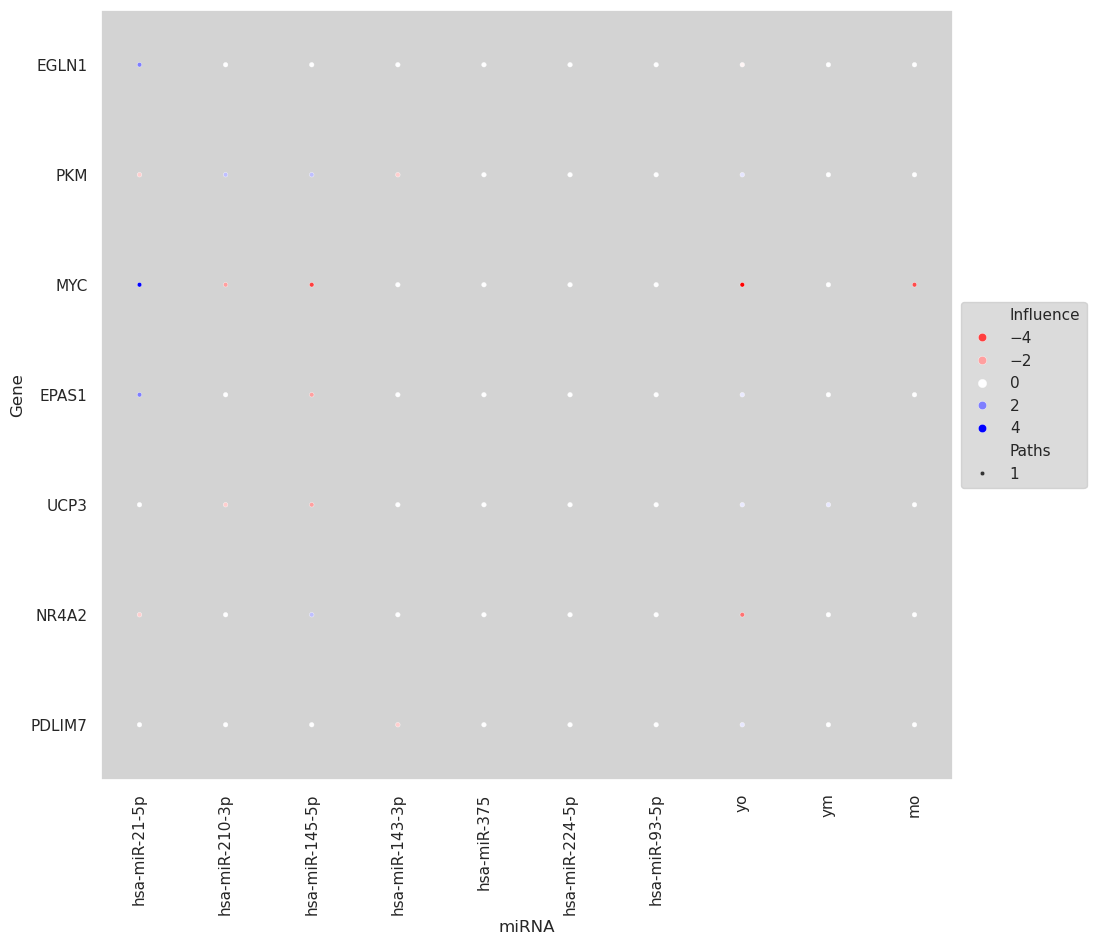

In [31]:
plot_dotplot(int_influence_muscle_df.iloc[:, : 10],gene_scale=0.7, mirna_scale=1 )

In [32]:
int_influence_muscle_df.iloc[:,-3:]

,yo,ym,mo
EGLN1,-0.210341,0.000000,0.000000
PKM,0.408310,0.000000,0.000000
MYC,-5.335859,0.000000,-3.763937
EPAS1,0.332727,0.000000,0.000000
UCP3,0.350788,0.382571,0.000000
NR4A2,-2.953590,0.000000,0.000000
PDLIM7,0.379850,0.000000,0.000000


But there are genes on different stages that we may want a different effect.
Therefore, we can see the curve that the gene has.

In [33]:
theshold = 0.5
up_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] > theshold) | 
    (int_influence_muscle_df['mo'] > theshold) | 
    (int_influence_muscle_df['yo'] > theshold)].copy()


In [34]:

# Add the 'sum' column
up_regulated['sum'] = up_regulated[['yo', 'ym', 'mo']].sum(axis=1)

up_regulated=up_regulated.sort_values(by='sum')
up_regulated.drop(columns=['sum'], inplace=True)
up_regulated[['yo','ym','mo']]

,yo,ym,mo


In [35]:
plot_dotplot(up_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )

ValueError: min() arg is an empty sequence

In [36]:
theshold = -2
down_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] < theshold) 
    | (int_influence_muscle_df['mo'] < theshold) 
    | (int_influence_muscle_df['yo'] < theshold)
]


In [37]:
down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']
down_regulated=down_regulated.sort_values(by='sum')
down_regulated.drop(columns=['sum'], inplace=True)
down_regulated[['yo','ym','mo']]

/tmp/ipykernel_36871/1096668806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']


,yo,ym,mo
MYC,-5.335859,0.0,-3.763937
NR4A2,-2.953590,0.0,0.000000


genes 2
mirnas 10


ValueError: not enough values to unpack (expected at least 3, got 2)

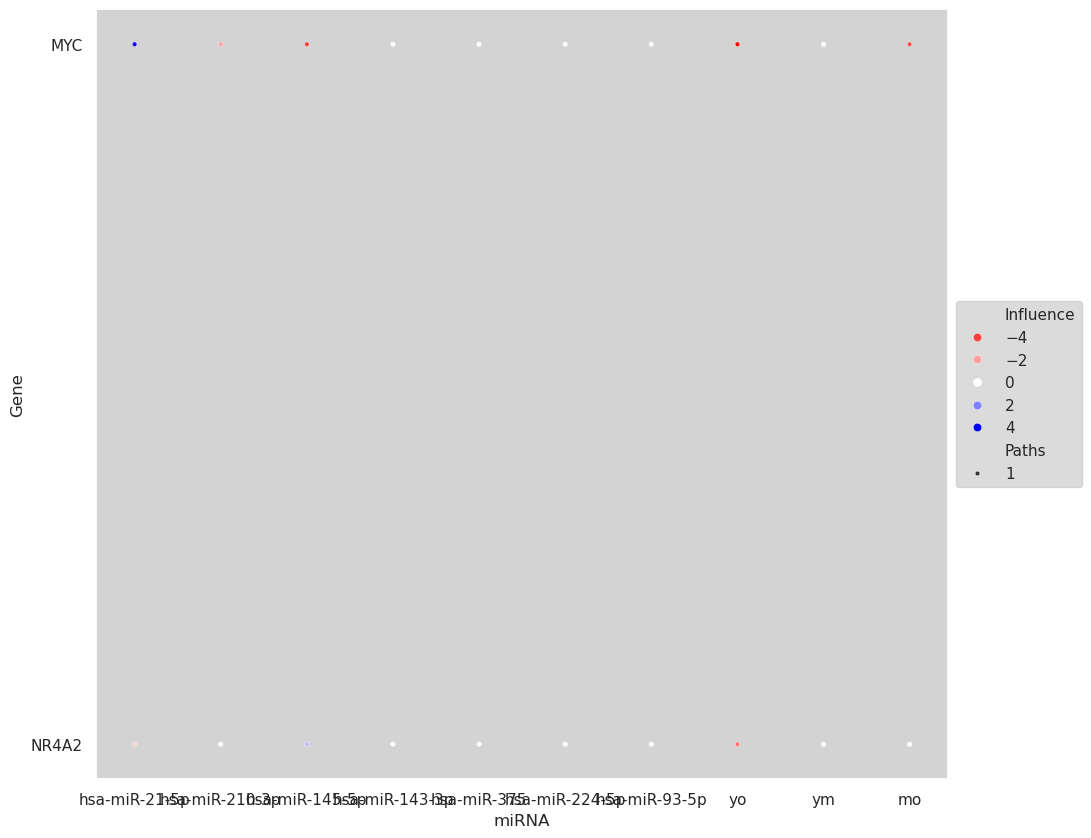

In [38]:
plot_dotplot(down_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )

In [ ]:
def get_cytoscape_filter_from_list(mirnas_good:list)->str:
    query_mirna = ""
    for mir in mirnas_good:
        query_mirna = query_mirna + f"({mir})|"
    return query_mirna

In [39]:
get_cytoscape_filter_from_list(list(int_influence_muscle_df.columns)[:-3])

'(hsa-miR-21-5p)|(hsa-miR-210-3p)|(hsa-miR-145-5p)|(hsa-miR-143-3p)|(hsa-miR-375)|(hsa-miR-224-5p)|(hsa-miR-93-5p)|'